# k-NN, n_neighbors = 20

In [1]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [2]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [4]:
# Initialize the Logistic Regression model with adjusted hyperparameters
kn_classifier = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Train the model on the scaled training data
kn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [5]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [6]:
y_pred = kn_classifier.predict(X_test)

Eval_kn_classifier =classification_task(kn_classifier, X_train, y_train ,X_test, y_test, y_pred,'KNN')
Eval_kn_classifier

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
KNN,0.831423,0.818663,0.795149,0.818663,0.777993,0.818663


Accuracy: 0.82


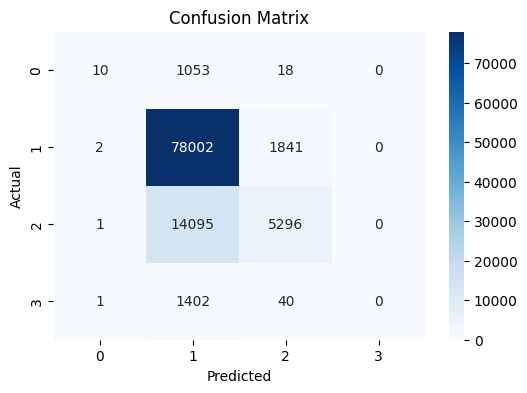

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.01      0.02      1081
           1       0.82      0.98      0.89     79845
           2       0.74      0.27      0.40     19392
           3       0.00      0.00      0.00      1443

    accuracy                           0.82    101761
   macro avg       0.57      0.31      0.33    101761
weighted avg       0.80      0.82      0.78    101761



In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)